# Association Rule Learning using the Apriori Algorithm

| Key              | Value                                                                                                                                                                                                                                                                                                        |
|:-----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4206 and BFS 4102                                                                                                                                                                                                                                                                                        |
| **Course Names** | BBT 4206: Business Intelligence II (Week 1-3 of 13) and<br/>BFS 4102: Advanced Business Data Analytics (Week 4-6 of 13)                                                                                                                                                                                      |
| **Semester**     | August to November 2025                                                                                                                                                                                                                                                                                      |
| **Lecturer**     | Allan Omondi                                                                                                                                                                                                                                                                                                 |
| **Contact**      | aomondi@strathmore.edu                                                                                                                                                                                                                                                                                       |
| **Note**         | The lecture contains both theory and practice.<br/>This notebook forms part of the practice.<br/>It is intended for educational purposes only.<br/>Recommended citation: [BibTex](https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining/refs/heads/main/RecommendedCitation.bib) |

**Business Context**: A supermarket chain seeks to uncover frequent item combinations from historical transactions to improve product placement, plan promotions, and increase cross-selling.

**Dataset**: A synthetic dataset of transactions, where each transaction is a list of items purchased together.

## Step 1: Import the necessary libraries

**Purpose**: This chunk imports all the necessary libraries for data analysis, machine learning, and visualization.

1. **For data manipulation - [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html):**
    - `pandas as pd`: For loading the dataset, creating and managing DataFrames, data manipulation and analysis using DataFrames

2. **For data preprocessing and transformation - [mlxtend](https://rasbt.github.io/mlxtend/)**
    - `TransactionEncoder`: Converts transaction data into a binary matrix format

3. **For association rule learning - [mlxtend](https://rasbt.github.io/mlxtend/)**
    - `apriori`: Implements the Apriori algorithm for finding frequent itemsets
    - `association_rules`: Generates rules from frequent itemsets

4. **For data visualization - [matplotlib](https://matplotlib.org/stable/gallery/index.html) and [seaborn](https://seaborn.pydata.org/examples/index.html)**
    - `matplotlib.pyplot as plt`: For basic plotting functionality
    - `seaborn as sns`: For enhanced statistical visualizations

5. **For suppressing warnings - [warnings](https://docs.python.org/3/library/warnings.html)**
    - `warnings`: Controls warning messages
    - `warnings.filterwarnings('ignore')`: Suppresses warning messages for cleaner output
    - Used to suppress warnings that may arise during the execution of the code. Even though it is not necessary for the code to run, it helps in keeping the output clean and focused on the results.

In [1]:
# For data manipulation
import pandas as pd
import os

# For data preprocessing and transformation
from mlxtend.preprocessing import TransactionEncoder

# For Association Rule Learning
from mlxtend.frequent_patterns import apriori, association_rules

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

1. **Data Loading Process**
    - Uses a context manager (`with` statement) for proper resource handling
    - Steps:
        1. Opens URL connection
        2. Reads binary content
        3. Decodes from bytes to UTF-8 string
        4. Splits into lines and processes each line

2. **Data Processing**
    - List comprehension transforms raw data into a structured format
    - Each transaction is processed by:
        - `strip()`: Removes whitespace
        - `split(',')`: Creates a list of items from comma-separated values

3. **Output**
    - Prints the total number of transactions
    - Shows the first three transactions as a sample


In [2]:
transactions = [
    ['matoke', 'sukuma wiki', 'kienyeji chicken'],
    ['matoke', 'beans', 'maziwa mala', 'ndizi'],
    ['matoke', 'beans', 'maziwa mala', 'mango'],
    ['maziwa mala', 'matoke', 'beans', 'ndizi'],
    ['maziwa mala', 'matoke', 'beans', 'mango']
]

print(f"Total number of transactions: {len(transactions)}")
print("\nFirst three transactions:")
transactions[:3]

Total number of transactions: 5

First three transactions:


[['matoke', 'sukuma wiki', 'kienyeji chicken'],
 ['matoke', 'beans', 'maziwa mala', 'ndizi'],
 ['matoke', 'beans', 'maziwa mala', 'mango']]

## Step 3: Convert the transaction list into a one-hot encoded DataFrame

**Purpose:**

The purpose of this chunk is to format the transaction data correctly. This is essential for:
- Running the Apriori algorithm
- Computing association rules
- Analyzing item frequencies and relationships

1. **Transaction Encoder Initialization**
    - Creates a new `TransactionEncoder` object called `encoder`
    - Purpose: To convert transaction lists into a binary matrix format

2. **Fit and Transform Process**
    - `encoder.fit(transactions)`:
        - Learns all unique items across all transactions
        - Creates a mapping of items to columns

    - `transform(transactions)`:
        - Converts transactions into a binary matrix
        - Each row represents one transaction
        - Each column represents one item
        - Values: True/False indicating item presence

3. **DataFrame Creation**
    - Converts the binary matrix into a `pandas` DataFrame
    - Uses `encoder.columns_` to retrieve the column names
    - Each column name is a unique item
    - Each row shows items present (True) or absent (False)

4. **Data Preview**
    - `transaction_data.head()`: Shows first five rows of transformed data

**Example:**
If the original transactions were:
```
Transaction 1: ["milk", "bread"]
Transaction 2: ["bread", "butter"]
```
The transformed data would look like this:
```
   milk  bread  butter
0  True   True  False
1  False  True   True
```

In [3]:
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
transaction_data = pd.DataFrame(onehot, columns=encoder.columns_)
transaction_data.head()

,beans,kienyeji chicken,mango,matoke,maziwa mala,ndizi,sukuma wiki
0,False,True,False,True,False,False,True
1,True,False,False,True,True,True,False
2,True,False,True,True,True,False,False
3,True,False,False,True,True,True,False
4,True,False,True,True,True,False,False


## Step 4: Generate frequent `itemsets` using the Apriori algorithm

1. **Apriori Algorithm Application**
    - Function: `apriori()`
    - Parameters:
        - `transaction_data`: Binary encoded transaction matrix
        - `min_support=0.02`: Minimum support threshold (2%)
        - `use_colnames=True`: Use item names instead of indices

2. **Support Threshold**
    - Support(itemset X) = (number of transactions containing itemset X) / (total transactions)
    - 0.02 means itemset X must appear in at least 2% of transactions
    - Helps filter out rare combinations

3. **Result Generation**
    - Creates a DataFrame containing:
        - `itemsets`: Combinations of items
        - `support`: Frequency of occurrence

4. **Result Processing**
    - `sort_values(by='support', ascending=False)`: Orders by support value (highest first)
    - `head(10)`: Shows top 10 most frequent itemsets

In [4]:
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
3,1.0,(matoke)
0,0.8,(beans)
4,0.8,(maziwa mala)
9,0.8,"(beans, maziwa mala)"
8,0.8,"(beans, matoke)"
21,0.8,"(beans, matoke, maziwa mala)"
15,0.8,"(matoke, maziwa mala)"
10,0.4,"(beans, ndizi)"
2,0.4,(mango)
13,0.4,"(mango, matoke)"


## Step 5: Generate and display the association rules

1. **Rules Generation**
    - Function: `association_rules()`
    - Input: `frequent_itemsets` from Apriori algorithm
    - Parameters:
        - `metric='lift'`: A measure of how much more often items in the antecedent and the items in the consequent appear together in transactions compared to what would be expected if they were statistically independent.
        - `min_threshold=1.0`: Minimum lift value to include

2. **Rules and Key Metrics**
    - `antecedents`: "If" part of the rule (items in a basket)
    - `consequents`: "Then" part of the rule (likely additional items)
    - `support`: Frequency of items appearing together
    - `confidence`: Probability of consequent given antecedent
    - `lift`: Ratio of observed support to expected support

3. **Sorting and Display**
    - Sorts rules by confidence (highest first)
    - Shows the top 10 strongest associations
    - Displays most relevant columns for analysis

In [5]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

### Display the top 10 rules sorted by confidence

In [6]:
rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
1,(mango),(beans),0.4,1.0,1.25
2,(beans),(matoke),0.8,1.0,1.00
5,(maziwa mala),(beans),0.8,1.0,1.25
4,(beans),(maziwa mala),0.8,1.0,1.25
30,"(beans, mango)",(maziwa mala),0.4,1.0,1.25
28,(mango),"(beans, matoke)",0.4,1.0,1.25
7,(ndizi),(beans),0.4,1.0,1.25
9,(kienyeji chicken),(matoke),0.2,1.0,1.00
11,(sukuma wiki),(kienyeji chicken),0.2,1.0,5.00
10,(kienyeji chicken),(sukuma wiki),0.2,1.0,5.00


### Display the top 10 rules sorted by lift and then confidence

In [7]:
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
11,(sukuma wiki),(kienyeji chicken),0.2,1.0,5.00
10,(kienyeji chicken),(sukuma wiki),0.2,1.0,5.00
54,"(matoke, kienyeji chicken)",(sukuma wiki),0.2,1.0,5.00
55,"(matoke, sukuma wiki)",(kienyeji chicken),0.2,1.0,5.00
59,(sukuma wiki),"(matoke, kienyeji chicken)",0.2,1.0,5.00
58,(kienyeji chicken),"(matoke, sukuma wiki)",0.2,1.0,5.00
1,(mango),(beans),0.4,1.0,1.25
5,(maziwa mala),(beans),0.8,1.0,1.25
4,(beans),(maziwa mala),0.8,1.0,1.25
30,"(beans, mango)",(maziwa mala),0.4,1.0,1.25


### Filter the rules to show only those with high confidence and high lift

In [8]:
strong_rules = rules[
    (rules['confidence'] >= 0.8) &
    (rules['lift'] >= 1.2)
].sort_values(by='confidence', ascending=False)
strong_rules.head(15)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
11,(sukuma wiki),(kienyeji chicken),0.2,1.0,5.00
10,(kienyeji chicken),(sukuma wiki),0.2,1.0,5.00
54,"(matoke, kienyeji chicken)",(sukuma wiki),0.2,1.0,5.00
55,"(matoke, sukuma wiki)",(kienyeji chicken),0.2,1.0,5.00
59,(sukuma wiki),"(matoke, kienyeji chicken)",0.2,1.0,5.00
58,(kienyeji chicken),"(matoke, sukuma wiki)",0.2,1.0,5.00
1,(mango),(beans),0.4,1.0,1.25
5,(maziwa mala),(beans),0.8,1.0,1.25
4,(beans),(maziwa mala),0.8,1.0,1.25
30,"(beans, mango)",(maziwa mala),0.4,1.0,1.25


## Step 6: Remove duplicate and redundant rules

In [9]:
# Filter out redundant rules where antecedents are subsets of other antecedents
def remove_duplicates(rules_df):
    rules_df = rules_df.sort_values(by=['lift', 'confidence'], ascending=[False, False]).reset_index(drop=True)
    unique_rules = []

    for i, row_i in rules_df.iterrows():
        is_redundant = False
        for j, row_j in enumerate(unique_rules):
            if row_i['consequents'] == row_j['consequents'] and row_i['antecedents'].issubset(row_j['antecedents']):
                is_redundant = True
                break

        # Keep only non-redundant rules
        if not is_redundant:
            unique_rules.append(row_i)

    return pd.DataFrame(unique_rules)

# Apply the function to the strong rules
nonredundant_rules = remove_duplicates(strong_rules)
nonredundant_rules = nonredundant_rules.sort_values(by=['lift', 'support'], ascending=[False, False])
nonredundant_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(sukuma wiki),(kienyeji chicken),0.2,1.0,5.00
1,(kienyeji chicken),(sukuma wiki),0.2,1.0,5.00
2,"(matoke, kienyeji chicken)",(sukuma wiki),0.2,1.0,5.00
3,"(matoke, sukuma wiki)",(kienyeji chicken),0.2,1.0,5.00
4,(sukuma wiki),"(matoke, kienyeji chicken)",0.2,1.0,5.00
5,(kienyeji chicken),"(matoke, sukuma wiki)",0.2,1.0,5.00
7,(maziwa mala),(beans),0.8,1.0,1.25
8,(beans),(maziwa mala),0.8,1.0,1.25
22,(maziwa mala),"(beans, matoke)",0.8,1.0,1.25
23,(beans),"(matoke, maziwa mala)",0.8,1.0,1.25


In [10]:
# Eliminate bidirectional redundancy in rules
def remove_bidirectional_redundancy(rules_df):
    # Create a set to track unique antecedent-consequent pairs
    seen_rules = set()
    filtered_rules = []  # Store the final filtered rules

    for _, row in rules_df.iterrows():
        # Combine antecedents and consequents into a frozenset so the order doesn't matter
        rule_pair = frozenset([frozenset(row['antecedents']), frozenset(row['consequents'])])

        # Only keep the rule if it hasn't already been seen
        if rule_pair not in seen_rules:
            seen_rules.add(rule_pair)
            filtered_rules.append(row)

    return pd.DataFrame(filtered_rules)

# Apply the function to the strong rules
cleaned_rules = remove_bidirectional_redundancy(nonredundant_rules)
cleaned_rules = cleaned_rules.sort_values(by=['lift', 'support'], ascending=[False, False])
cleaned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(sukuma wiki),(kienyeji chicken),0.2,1.0,5.00
2,"(matoke, kienyeji chicken)",(sukuma wiki),0.2,1.0,5.00
3,"(matoke, sukuma wiki)",(kienyeji chicken),0.2,1.0,5.00
7,(maziwa mala),(beans),0.8,1.0,1.25
22,(maziwa mala),"(beans, matoke)",0.8,1.0,1.25
23,(beans),"(matoke, maziwa mala)",0.8,1.0,1.25
6,(mango),(beans),0.4,1.0,1.25
9,"(beans, mango)",(maziwa mala),0.4,1.0,1.25
10,(mango),"(beans, matoke)",0.4,1.0,1.25
11,(ndizi),(beans),0.4,1.0,1.25


**List of Rules**

In [11]:
cleaned_rules = cleaned_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
cleaned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
0,(sukuma wiki),(kienyeji chicken),0.2,1.0,5.00
2,"(matoke, kienyeji chicken)",(sukuma wiki),0.2,1.0,5.00
3,"(matoke, sukuma wiki)",(kienyeji chicken),0.2,1.0,5.00
7,(maziwa mala),(beans),0.8,1.0,1.25
22,(maziwa mala),"(beans, matoke)",0.8,1.0,1.25
23,(beans),"(matoke, maziwa mala)",0.8,1.0,1.25
6,(mango),(beans),0.4,1.0,1.25
9,"(beans, mango)",(maziwa mala),0.4,1.0,1.25
10,(mango),"(beans, matoke)",0.4,1.0,1.25
11,(ndizi),(beans),0.4,1.0,1.25


## Step 7: Save the rules as a CSV file

In [12]:
# Define the output path
output_path = './rule/top_rules_7a.csv'

# Ensure the data directory exists
if not os.path.exists('./rule'):
    os.makedirs('./rule')

# Save the top rules as a CSV file
cleaned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10).to_csv(output_path, index=False)
print(f"\n✅ Top rules saved to {output_path}")

# Provide a download link if running in Google Colab
try:
    from google.colab import files
    files.download(output_path)
except ImportError:
    print("❌ Not running in Google Colab, skipped rule download link.")


✅ Top rules saved to ./rule/top_rules_7a.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Step 7: Visualize rules

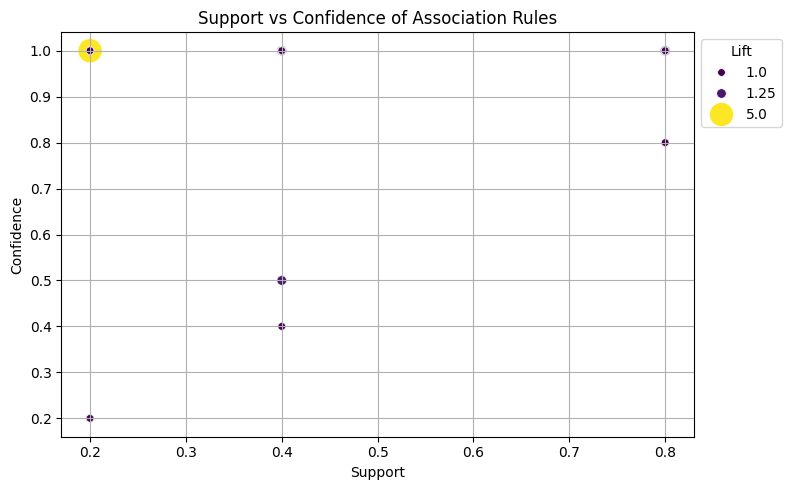

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Support vs Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

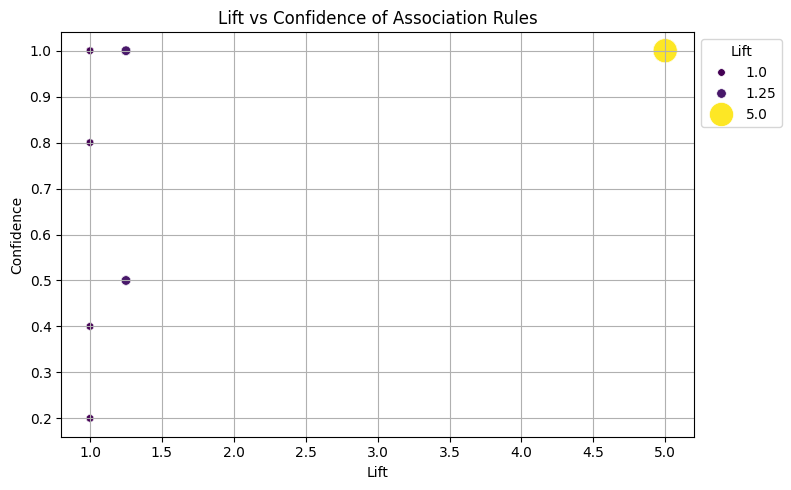

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='lift', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Lift vs Confidence of Association Rules')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

## Step 8: Utilize the Rules

- Association rule mining is a **descriptive analysis** technique used to uncover useful associations/relationships in the data.
- Once the associations/relationships have been uncovered, they can be used to inform business decisions such as:
    - **Product Placement**: Place frequently bought together items near each other in stores.
    - **Promotions**: Create promotions for items that are often purchased together.
    - **Website Layout**: Design website sections to highlight complementary products.
    - **Cross-Selling**: Train staff to suggest related products during customer interactions.
    - **Inventory Management**: Stock items that are frequently bought together to reduce stockouts.
    - **Personalized Recommendations**: Use rules to recommend products based on the items that the customer is about to purchase.
- The following chunks present two of the ways in which a business can use the rules in existing information systems.

### 1. Use Rules in a Traditional Programming Context (e.g., `if` Statements)
If the rules generated are straightforward and few, they can be implemented using traditional programming constructs, such as `if` statements. These rules can then be operationalized for specific use cases such as:
- Recommending items based on user transactions
- Designing a system that triggers alerts or actions when conditions are met

This approach is straightforward but **manual and static**, especially for larger datasets. If the rules change frequently (to adapt to changing consumer preferences), manually updating them in the code can be challenging.

In [15]:
def recommend_items(cart):
    if {'sukuma wiki', 'matoke'}.issubset(cart):
        return 'kienyeji chicken'
    elif {'matoke', 'kienyeji chicken'}.issubset(cart):
        return 'sukuma wiki'
    elif {'maziwa mala'}.issubset(cart):
        return 'beans'
    else:
        return 'No specific recommendation'

# Example usage:
customer_cart = {'maziwa mala', 'matoke', 'sukuma wiki'}
recommendation = recommend_items(customer_cart)
print(f"Customer's shopping cart contains: {customer_cart}")
print(f"Recommended item(s): {recommendation}")

Customer's shopping cart contains: {'matoke', 'sukuma wiki', 'maziwa mala'}
Recommended item(s): kienyeji chicken


### 2. Integrate with a Rule-Based System
An alternative is to store the rules dynamically in a database or as part of a rule engine. This allows:
- Rules to be updated without modifying the code
- Easier rule management for scalable use

- The `if` statements implementation only returns the consequents of the first matching rule and then exits. It does not identify or aggregate all possible consequents for all matching rules.
- A better alternative is to loop through all rules and check if the antecedents are present in the customer's cart. If they are, the consequents can be added to a list of recommendations.

In [16]:
rules = [
    {'antecedents': {'sukuma wiki', 'matoke'}, 'consequents': {'kienyeji chicken'}},
    {'antecedents': {'matoke', 'kienyeji chicken'}, 'consequents': {'sukuma wiki'}},
    {'antecedents': {'maziwa mala'}, 'consequents': {'beans'}},
    {'antecedents': {'matoke', 'beans'}, 'consequents': {'maziwa mala'}},
    {'antecedents': {'matoke', 'maziwa mala'}, 'consequents': {'beans'}},
    {'antecedents': {'mango'}, 'consequents': {'beans'}},
    {'antecedents': {'beans', 'mango'}, 'consequents': {'maziwa mala'}},
    {'antecedents': {'mango'}, 'consequents': {'matoke', 'beans'}},
    {'antecedents': {'ndizi'}, 'consequents': {'maziwa mala'}},
    {'antecedents': {'matoke', 'mango'}, 'consequents': {'beans'}}
]

In [17]:
def dynamic_recommender(cart, rules_df):
    recommendations = set()
    for rule in rules_df:
        if rule['antecedents'].issubset(cart):
            recommendations.update(rule['consequents']) # Add consequents to recommendations
    # Remove items already in the cart from recommendations
    recommendations.difference_update(cart)
    return list(recommendations) if recommendations else 'No recommendation'

# Example usage:
customer_cart = {'matoke', 'sukuma wiki', 'maziwa mala'}
recommendation = dynamic_recommender(customer_cart, rules)
print(f"Customer's shopping cart contains: {customer_cart}")
print(f"Recommended item(s): {recommendation}")

Customer's shopping cart contains: {'matoke', 'sukuma wiki', 'maziwa mala'}
Recommended item(s): ['beans', 'kienyeji chicken']


- An alternative to hardcoding the rules is to use the cleaned rules DataFrame created earlier or loaded from the CSV file.
- This allows for easier updates and management of rules, especially as the dataset grows or changes.

In [18]:
import pandas as pd
import ast
import re

def parse_frozenset(s):
    # Extract the set part from "frozenset({...})"
    match = re.match(r"frozenset\((.*)\)", s)
    if match:
        set_str = match.group(1)
        return frozenset(ast.literal_eval(set_str))
    else:
        # Fallback: try to parse as a set directly
        return frozenset(ast.literal_eval(s))

# Load the rules from CSV
cleaned_rules = pd.read_csv('./rule/top_rules_7a.csv')

# Parse the antecedents and consequents columns
cleaned_rules['antecedents'] = cleaned_rules['antecedents'].apply(parse_frozenset)
cleaned_rules['consequents'] = cleaned_rules['consequents'].apply(parse_frozenset)

In [19]:
def dynamic_recommender(cart, rules_df):
    recommendations = set()

    for _, rule in rules_df.iterrows():
        if rule['antecedents'].issubset(cart):
            recommendations.update(rule['consequents']) # Add consequents to recommendations
    # Remove items already in the cart from recommendations
    recommendations.difference_update(cart)
    return list(recommendations)

customer_cart = {'matoke', 'maziwa mala', 'sukuma wiki'}
recommended_items = dynamic_recommender(customer_cart, cleaned_rules)
print(f"Customer's shopping cart contains: {customer_cart}")
print(f"Recommended items: {recommended_items}")

Customer's shopping cart contains: {'matoke', 'sukuma wiki', 'maziwa mala'}
Recommended items: ['beans', 'kienyeji chicken']


## Step 9: Business Analysis
- `sukuma wiki`, `matoke`, and `kienyeji chicken` are frequently bought together.
- `maziwa mala` and `beans` are also frequently bought together.
- The business can use this to:
    - Place these items near each other in the store.
    - Create promotions that bundle these items together.
    - Train the staff to suggest these items when customers purchase one of them.
- The rules can be integrated into the store's POS system to provide real-time recommendations to cashiers or customers.
- The business can also analyze the rules to identify potential gaps in their product offerings or to optimize inventory management.
- Overall, the insights from association rule learning can help the business improve customer satisfaction, increase sales, and optimize operations.
- The business should continuously monitor and update the rules as customer preferences and purchasing behaviors evolve over time.
- This can be done by periodically re-running the Apriori algorithm on new transaction data. This ensures that the business stays relevant and responsive to market trends.

# References
Hahsler, M., Chelluboina, S., Hornik, K., & Buchta, C. (2011). The arules R-Package Ecosystem: Analyzing Interesting Patterns from Large Transaction Datasets. Journal of Machine Learning Research, 12, 1977–1981.
